# Classification vs Regression

So, over the past few lectures, we've been talking about different Machine Learning models that you can create to help you **fit to an possible underlying trend in a dataset** and **generalize well to other data points**. However, a lot of the different models we have been creating are what we call **regression models**. Today, we'll be talking about another type of modeling: **classification**.

## Recap on Regression

Just to give a brief recap on what regression models are and what they do:

- Input a set of continuous variables as features
- Output a continuous value as its prediction
- Not good with discrete variables or categorial variables
- Example: predicting height based off of people's weights.
- Regression models can range from Linear Regression models to Neural Networks (we'll be going into what those are next lecture).

As we saw from the Linear Regression lecture, regression models can be incredibly useful in terms of predicting different **continuous variables**, but not well with predicting **discrete variables**.

So, in order to create models that are good at predicting discrete variables, we must introduce a new type of modelling: classification models. These models are useful for when we want to classify some sample inputs into classes or categories. They can:
- Input lists of features or qualities of a sample and output a class or label
- Can take in discrete or categorical variables
- Can involve generating a probability for an output to be each different class, and selecting the class with the highest probability

Today, we'll be focusing a lot of different classification models, and different circumstances under which these kinds of models would be useful, as well as the different implementations for these models.

## Some Inuition on Classification

Let's take a look at the following picture:

<img src='machine_learning_classification_graph.png'>

**Question:** Let's say we introduced a new point $X$ into the picture above. What would you guess the type (or class) the point would be?

From the picture, the intuition behind predicting $X$ would be to just look at the different points nearby it! In other words, we can **predict the class of a point by looking at its closest neighbors.**

### Real World Example

One real world example of where predicting the class fo a point based off of its neighbors is with an upcoming exam. Let's say you ask two different people who already took the exam how hard it was, so you can gauge how hard it might be for yourself. But let's also say between the two people you ask, one is super duper smart and the other is Pass/No-Passing the class. Their perspectives of how difficult the test can be incredibly different from another. The super duper smart person might say the test was pretty easy, which may have been a result of their intellect and the time they put into studying for the exam. The person taking the class Pass/No Pass might think the test was incredibly hard, which may have been a result of them putting in less effort into the class due to the fact that they only need to Pass it.

So, we see that both people can have incredibly different responses (or classes) of how difficult the exam was, and both of their responses might not be useful to you, as their skill levels and the amount of preparation they put into the class may be very different from your owns. In order to accurately gauge how difficult the test might be, you want to ask people around you (in terms of skill level and amount of preparation)!

However, let's say you ask someone with around the same skill level/amount of preparation with you. That person could be a good indicator of how difficult the test might be for you, but asking that one person might not be enough. Let's say you wanted to ask more people in taking the same class what they thought of the exam. You could average out their responses, and get a general gist of how difficult the exam might be for yourself. However, if you continue to keep asking people, you might get to the point where you ask a number close to the size of the class! At that point, how difficult you think the exam might be for you is just how difficult the exam itself was on average. So, we can see that not only are **the types of people you ask** an important to factor consider, but also **the number of people** you ask can affect your result as well.

The strategy that we used to determine how difficult the exam was going to be for yourself is implemented exactly how a famous algorithm in machine learning is implemented, called **k-Nearest Neighbors** (shortened as kNN).

# KNN

# Decision Trees

Now that we've taken a good look at KNN and how useful it can be, let's take a look at a different type of modelling that also helps us classify points!

Decision trees rely on the idea of **splitting up your data points with linear decision boundaries into different sections that are able to be classified by one class.** In order words, it's asking a series of yes or no questions to make our decision/estimation on which class an input point falls under.

Here's a couple examples of what a decision trees look like:

<img src='XKCD.png' width=35%>

As we can see from the tree above, we are able to answer a yes or no question at every step, and depending on our answer, we either went one way or another through the three. They are very synonymous to flowcharts, but we'll go into more intricacies with decision trees later on. In practice, with decision tree models, they won't have cycles, but they'll have the same logic structures. Here's another example of a decision tree made by Rosa!

<img src='meme.png' width=35%>

Meme credit to $\text{Rosa Choe}^{\text{TM}}$

Now that we've seen a couple examples of decision trees, we can see how they can be used to help us classify a given input data point with a series of question to determine which class the data point lies within.

**Question:** How might you go about making the different components of a decision tree?

From looking at the decision We would want to optimize our questions (or different steps in the decision tree) to be able to split up the data into different classes as much as possible. But how do we know where cut off different 

## Entropy

In [1]:
from helpers import plotPairwiseDecisionTrees

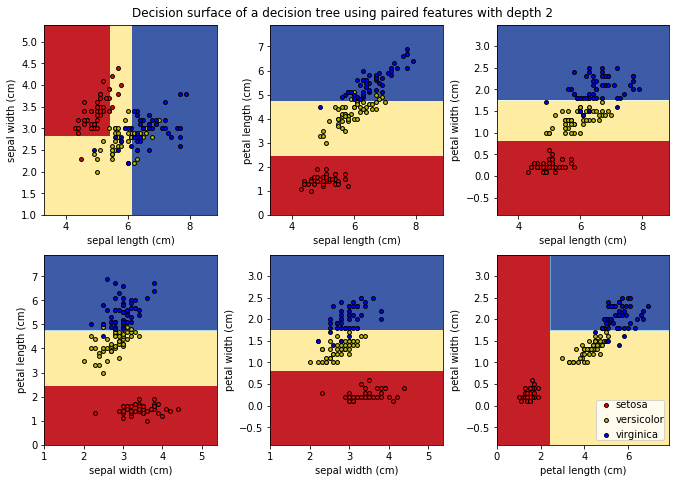

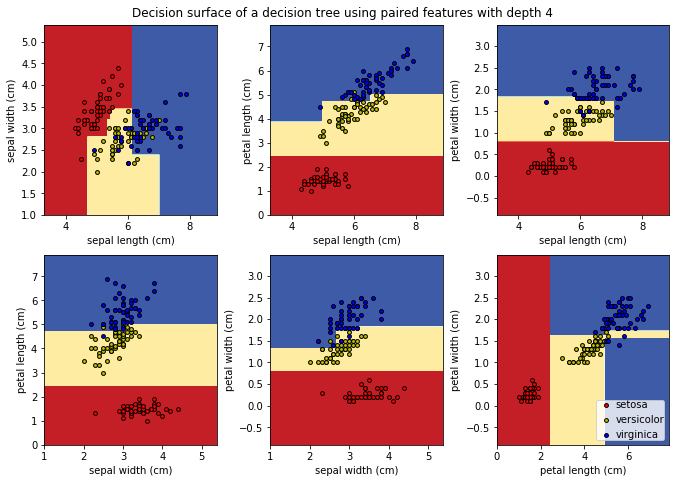

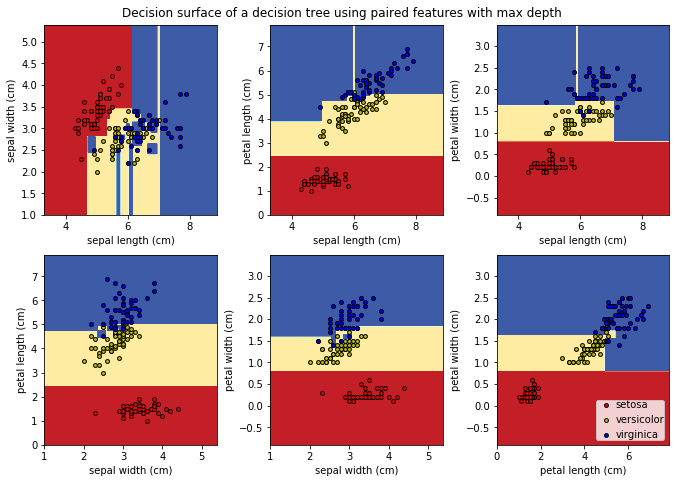

In [2]:
# Max Depth 2
plotPairwiseDecisionTrees(2)
# Max Depth 4
plotPairwiseDecisionTrees(4)
# No Math Depth
plotPairwiseDecisionTrees()